In [1]:
import torch 
from torch import nn
from pathlib import Path

In [2]:
current_path = Path.cwd()
dir_path = current_path / 'Data'/ 'models'
model_path = dir_path / 'slr_state_dict.pth'
model_path

WindowsPath('c:/Users/admin/Desktop/Machine Learning/ArtificialIntelligence/DeepLearning/regression/Data/models/slr_state_dict.pth')

In [3]:
# Load Model
model0 = torch.load(f=model_path)
model0

OrderedDict([('weights', tensor([0.7039])), ('bias', tensor([0.3093]))])

# Now we have weights of loaded model but not its definition


In [4]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        # tensor created by nn.parameter has properties of nn.module that is why we have used nn.parameter to create tensor not directly initialised tensor
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self,x): 
        return self.weights * x + self.bias #performs linear transformation of x

In [5]:
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.5696])), ('bias', tensor([-1.5583]))])

In [6]:
model_0.load_state_dict(state_dict=model0)

<All keys matched successfully>

In [7]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7039])), ('bias', tensor([0.3093]))])

# Predictions

In [8]:
X_test = torch.tensor([[0.2600],
        [0.7800],
        [0.6000],
        [0.9000],
        [0.3400],
        [0.9600],
        [0.5200],
        [0.5000],
        [0.6400],
        [0.3800]])
y_test = torch.tensor([[0.4820],
        [0.8460],
        [0.7200],
        [0.9300],
        [0.5380],
        [0.9720],
        [0.6640],
        [0.6500],
        [0.7480],
        [0.5660]])

In [9]:
# put model in eval mode
model_0.eval()
with torch.inference_mode():
    y_pred = model_0(X_test)

In [10]:
y_pred

tensor([[0.4923],
        [0.8584],
        [0.7317],
        [0.9428],
        [0.5486],
        [0.9851],
        [0.6754],
        [0.6613],
        [0.7598],
        [0.5768]])

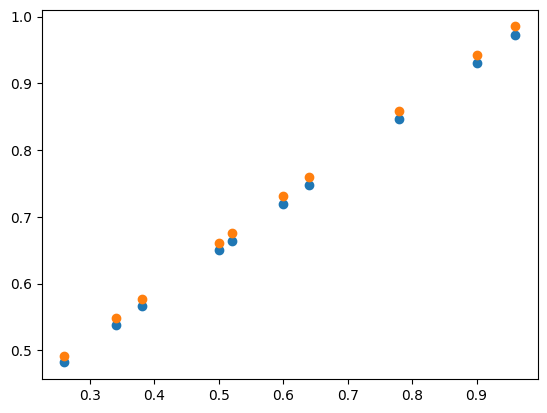

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, label='test points')
plt.scatter(X_test, y_pred, label='predicted points')